<a href="https://colab.research.google.com/github/yangyang1598/Yolo_training/blob/main/Traffic_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import IPython
import numpy as np

## Load Model

*   drive mount 방식
*   개별 파일 업로드





In [ ]:
from google.colab import files
upload=files.upload()

Saving traffic-train-yolo_last.weights to traffic-train-yolo_last.weights


In [ ]:
cfg_file= '/content/traffic-train-yolo.cfg'
weight_file= '/content/traffic-train-yolo_last.weights'


In [ ]:
net = cv2.dnn.readNet(weight_file, cfg_file)

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

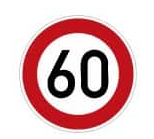

In [ ]:
img_path='/content/00001.PNG'
img=cv2.imread(img_path)
cv2_imshow(img)

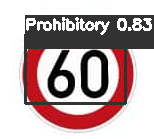

In [ ]:
height, width = img.shape[:2]
classes = [] 
with open("classes.names", "r") as f:
   classes = [line.strip() for line in f.readlines()]

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0),True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
class_ids = []
confidences = []
boxes = []
score=0.1
nms=0.4
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    # 검출 신뢰도
    if confidence > 0.5:
        # Object detected
        # 검출기의 경계상자 좌표는 0 ~ 1로 정규화되어있으므로 다시 전처리
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        dw = int(detection[2] * width)
        dh = int(detection[3] * height)
        # Rectangle coordinate
        x = int(center_x - dw / 2)
        y = int(center_y - dh / 2)
        boxes.append([x, y, dw, dh])
        confidences.append(float(confidence))
        class_ids.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, score, nms)
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    score = confidences[i]
    text = f'{label} {score:.2f}'
    # 경계상자와 클래스 정보 투영
    cv2.rectangle(img, (x, y), (x + w, y + h), (50, 50, 50), 2)
    cv2.rectangle(img, (x, y - 19), (int(x + len(text) * 2 * 4.5), y - 18 + len(text) * 2), (50, 50, 50), -1)
    cv2.putText(img, text, (x, y - 5), cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
cv2_imshow(img)

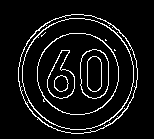

In [ ]:
img_gray=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
img_canny=cv2.Canny(img_gray,50,150)
cv2_imshow(img_canny)

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,861 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

## 이미지에서 글씨 추출하는 코드(failed ver_)

In [ ]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/00002.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

#pytesseract의 image to string을 써준다. 
#숫자니까 lang = 'None'으로

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

#결과를 보자.

print(text)
cv2_imshow(image)

In [ ]:
print(text)